In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("den.csv",sep=",")
df=data.copy()
df.head(5) #df.tail(5)

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [3]:
nan_varmi= data.isna().sum()
print(nan_varmi)

country_or_area    0
year               0
value              0
category           0
dtype: int64


In [4]:
if 'year' in df.columns:
    print(df['year'].value_counts())
    print(df['category'].value_counts())


year
2012    345
2009    345
2008    345
2013    345
2010    344
2006    343
2011    343
2007    343
2003    342
2001    342
2002    342
2004    342
2005    342
2000    341
1999    340
1998    339
1997    338
2014    338
1996    336
1995    335
1994    322
1993    317
1992    316
1991    312
1990    309
Name: count, dtype: int64
category
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent     1074
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent            1074
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent      1074
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                    1032
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent    

C:\Users\user\AppData\Local\Temp\ipykernel_14028\3563009116.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


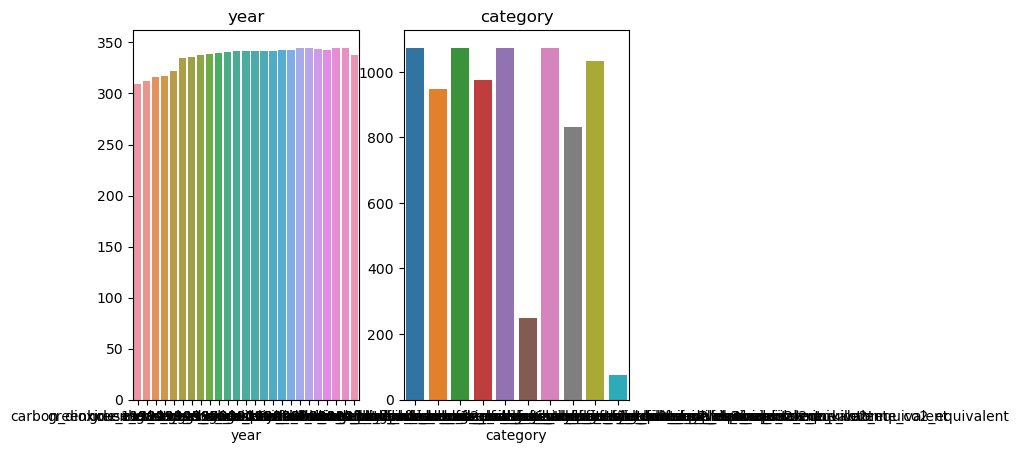

In [5]:
plt.subplot(1, 2, 2)
sns.countplot(x='category', data=df)
plt.title('category')
plt.xlabel('category')
plt.ylabel('')

plt.subplot(1, 2, 1)
sns.countplot(x='year', data=df)
plt.title('year')
plt.xlabel('year')
plt.ylabel('')



plt.tight_layout()
plt.show()

In [6]:
df.shape

(8406, 4)

In [7]:
df.info() #df.dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8406.0,2002.188437,7.151605,1990.000000,1996.000000,2002.000000,2008.000000,2.014000e+03
value,8406.0,205547.191371,804150.377036,0.000001,297.698022,7840.318326,65898.849435,7.422208e+06


In [9]:
df['country_or_area'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'value'}>]], dtype=object)

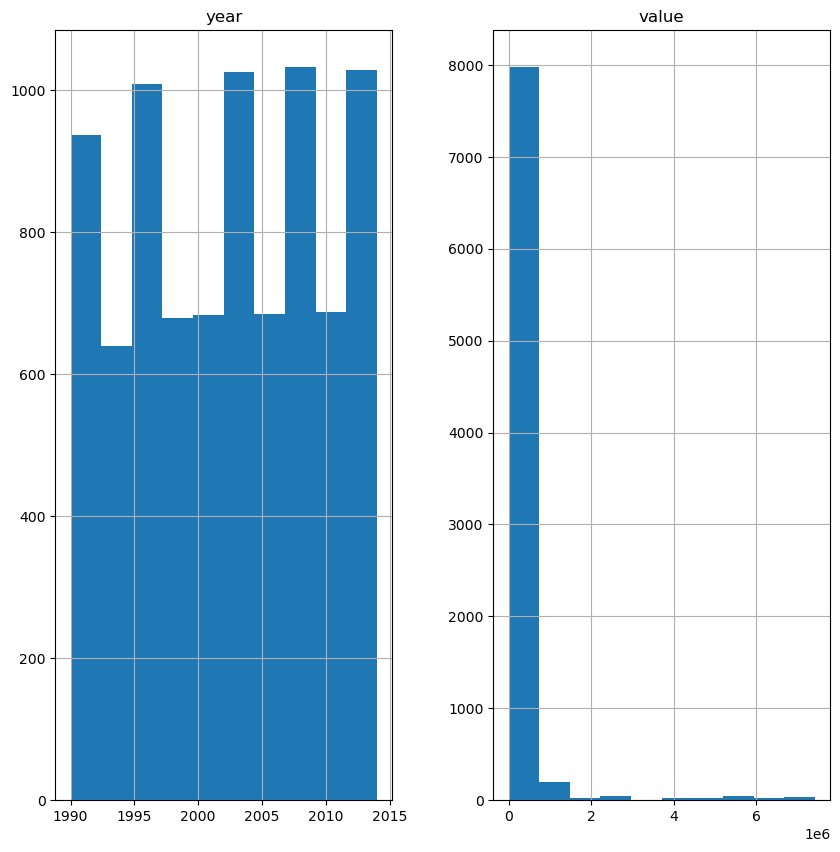

In [10]:
df.hist(figsize=(10, 10))

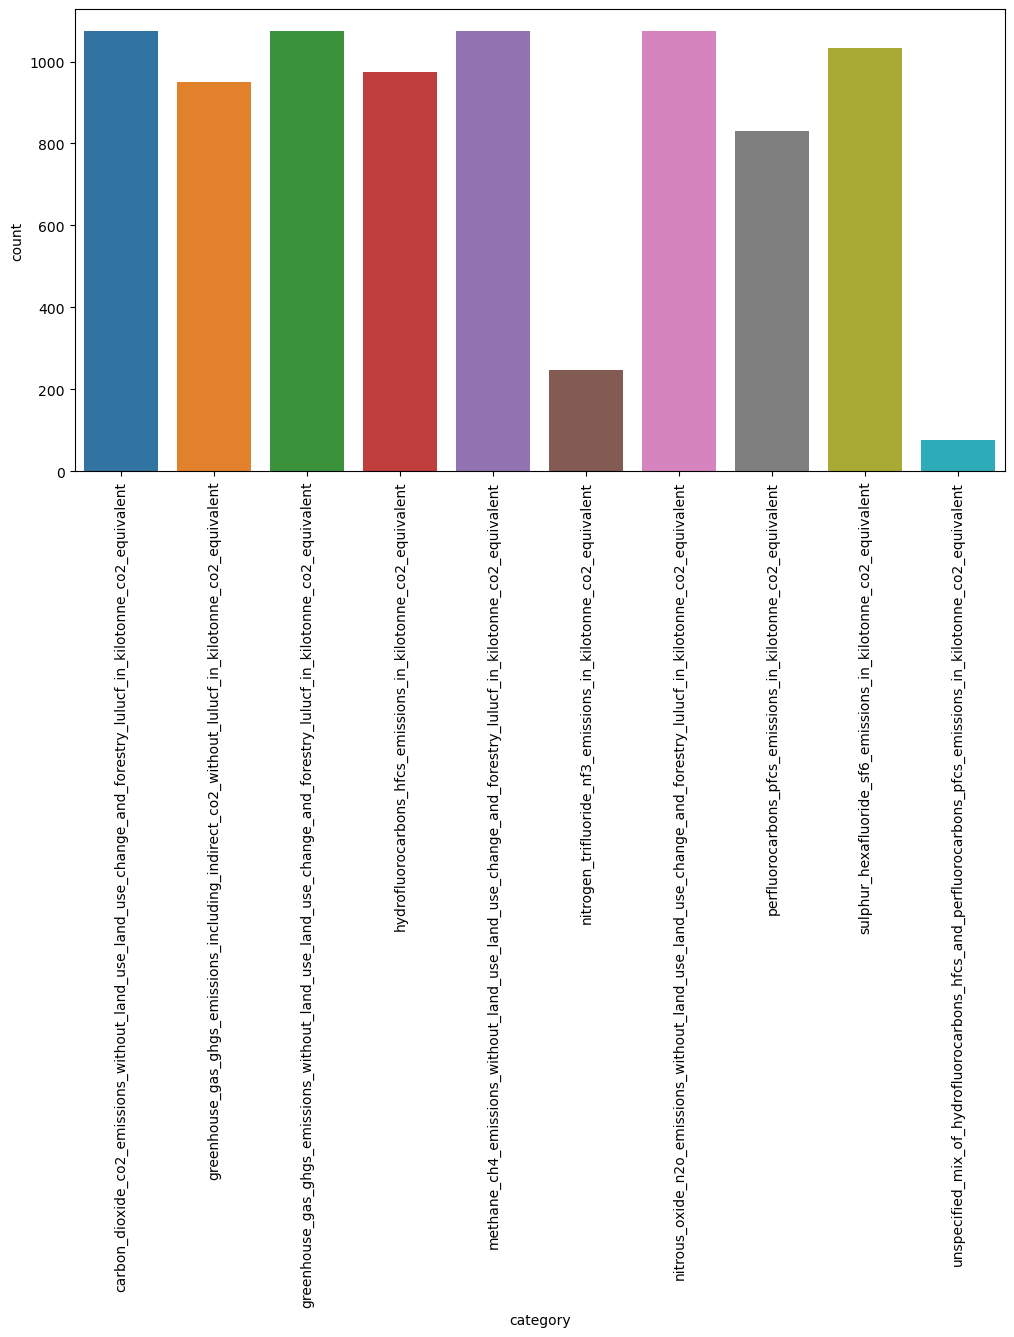

In [11]:
if 'category' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='category', data=df)
    plt.xticks(rotation=90)
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

X = df.drop('category', axis=1)
y = df['category']

X = pd.get_dummies(X, columns=['country_or_area'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X

,year,value,country_or_area_Australia,country_or_area_Austria,country_or_area_Belarus,country_or_area_Belgium,country_or_area_Bulgaria,country_or_area_Canada,country_or_area_Croatia,country_or_area_Cyprus,...,country_or_area_Russian Federation,country_or_area_Slovakia,country_or_area_Slovenia,country_or_area_Spain,country_or_area_Sweden,country_or_area_Switzerland,country_or_area_Turkey,country_or_area_Ukraine,country_or_area_United Kingdom,country_or_area_United States of America
0,2014,393126.946994,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2013,396913.936530,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012,406462.847704,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,403705.528314,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2010,406200.993184,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,1994,593.222570,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8402,1993,586.939752,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8403,1992,574.414624,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8404,1991,566.900968,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modeli tanımlayın ve eğitin
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7075898167975255

Confusion Matrix:
 [[489  20  48   0   3   0   0   0   0   0]
 [ 17 115 350   0   0   0   0   0   0   0]
 [ 39 331 172   0   0   0   0   0   0   0]
 [  0   0   0 357   3   1  15  43  41   0]
 [  8   0   0   2 522   0  27   0   0   0]
 [  0   0   0   0   0 107   0   5   4   0]
 [  0   0   0  15  34   0 492   4   0   0]
 [  0   0   0  45   0   1   2 286  57  11]
 [  0   0   0  29   0   0   0  56 410   5]
 [  0   0   0   3   0   4   0   2   4  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       560
           1       0.25      0.24      0.24       482
           2       0.30      0.32      0.31       542
           3       0.79      0.78      0.78       460
           4       0.93      0.93      0.93       559
           5       0.95      0.92      0.93       116
           6       0.92      0.90      0.91       545
           7       0.72      0.71      0.72       402
        

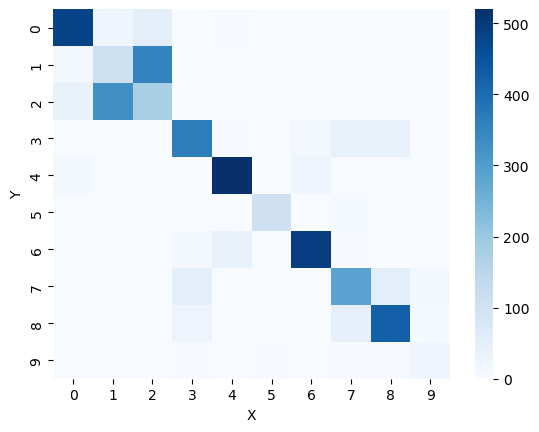

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Blues')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
